In [52]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv(('steps.csv'), delimiter= ';')
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [54]:
df = pd.merge(df1, df2, on = 'id') #'app' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [55]:
df['weight'].value_counts() #Get all the values. This may be less useful when there are many values.

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

In [56]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 5 we need to create a function that we then apply to the entire column
def abnormalweight(x):
    if(x < 50.0) or (x > 150.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(abnormalweight)


c:\Users\basbo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


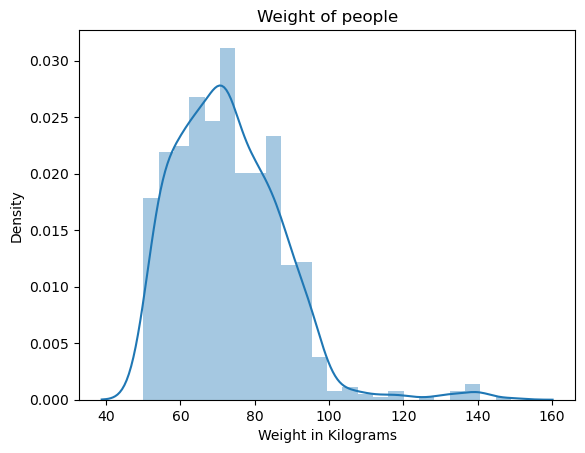

In [57]:
sns.distplot(df['weight']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of people')
plt.xlabel('Weight in Kilograms')
plt.show()

In [58]:
df['mean_steps'] = df.iloc[:,1:329].mean(axis=1)
df['median_steps'] = df.iloc[:,1:329].median(axis=1)
df['mean_steps'] = df['mean_steps'].apply(pd.to_numeric, errors='coerce')
#in het voorbeeld pak je de mediaan en mean van size. Hier reken je eerst apart mediaan en mean uit dan laat je de mean zien in een plot en dan wil je de median steps laten zien in een plot die de mean laat zien
mean_stepsline = df['mean_steps'].mean()
median_stepsline = df['median_steps'].median()
def above_5(x):
    if(x > 100000.0) or (x < 1000): 
        return float('NaN')
    else: 
        return x
df['mean_steps'] = df['mean_steps'].apply(above_5)


df = df[df['mean_steps'] < 18000]
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,median_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,4986.5


c:\Users\basbo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


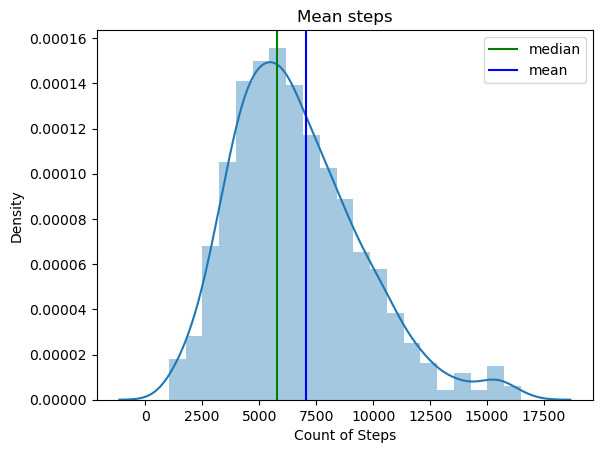

In [59]:
sns.distplot(df['mean_steps']) 
plt.title('Mean steps')
plt.xlabel('Count of Steps')
plt.axvline(median_stepsline, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_stepsline, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()


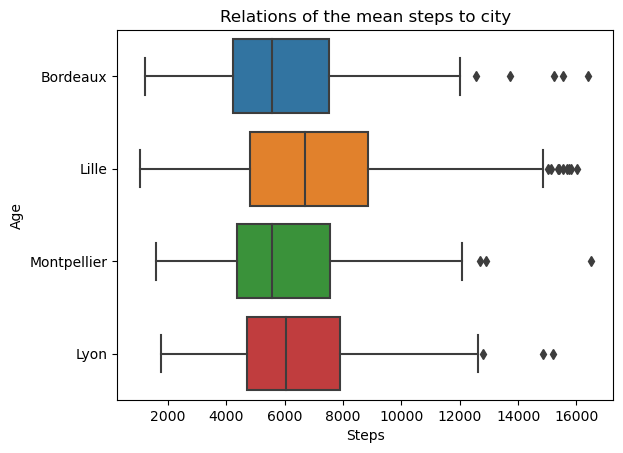

In [60]:
#sns.barplot(data=df, x='age' ,y='mean_steps',hue='gender') 
sns.boxplot(data=df, y='city' ,x='mean_steps') 
plt.title('Relations of the mean steps to city')
plt.ylabel('Age')
plt.xlabel('Steps')
plt.show()

In deze boxplot zie je dat het gemiddelde aantal stappen vrij dicht bij elkaar ligt. Wat interessant is dat in Lille de spreiding heel groot is, maar de mediaan het hoogste. Wat opvalt aan alle verschillende verbanden die je zoekt qua leeftijd/stad/educatie is dat alles heel dicht bij eklaar ligt qua gemiddelde stappen. In lille wordt over het algemeen het meest aantal stappen gezet en in Bordeaux het minst. Wat nog meer opvalt is dat in Montpellier over het algemeen als 2e het meeste stappen worden gelopen maar dat de mediaan bijna het laagste ligt van allemaal. 


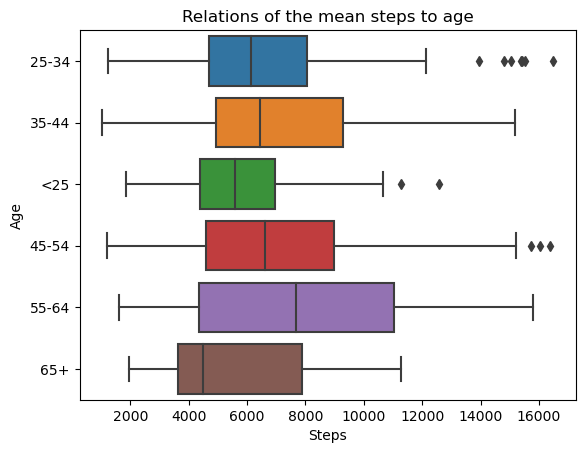

In [61]:
sns.boxplot(data=df, y='age' ,x='mean_steps') 
plt.title('Relations of the mean steps to age')
plt.ylabel('Age')
plt.xlabel('Steps')
plt.show()

Wat mij heel erg opvalt is dat de categorie van 55-64 een stuk meer stappen zet dan de jongere generaties. Dit kan zo zijn omdat zij nog wat meer beroepen uitvoeren die minder gedigitaliseerd zijn en dus meer loopwerk vereisen. Ook zit over het algemeen de jongere generatie meer binnen achter de gaming consoles en computer. Wellicht dat de wat oudere generatie toch vaker buiten is. Je ziet dat de jongste groep veel outliers heeft naar 140K+ stappen. Dit kan bijvoorbeeld zijn dat zij veel sporten of bijvoorbeeld veel naar feesten gaan en veel lopen op een festival.


Week 2- Linear Regression

In [62]:
df["gender_1"]= df["gender"]
df["gender_1"].replace(["Male", "Female"],
                        [1, 0], inplace=True)

df["city_1"]= df["city"]
df["city_1"].replace(["Lille", "Montpellier", "Lyon", "Bordeaux"],
                        [0, 1, 2, 3], inplace=True)
df["age_1"]= df["age"]
df["age_1"].replace(["25-34", "35-44", "45-54", "<25", "55-64", "65+"],
                        [1, 2, 3, 0,4,5], inplace=True)

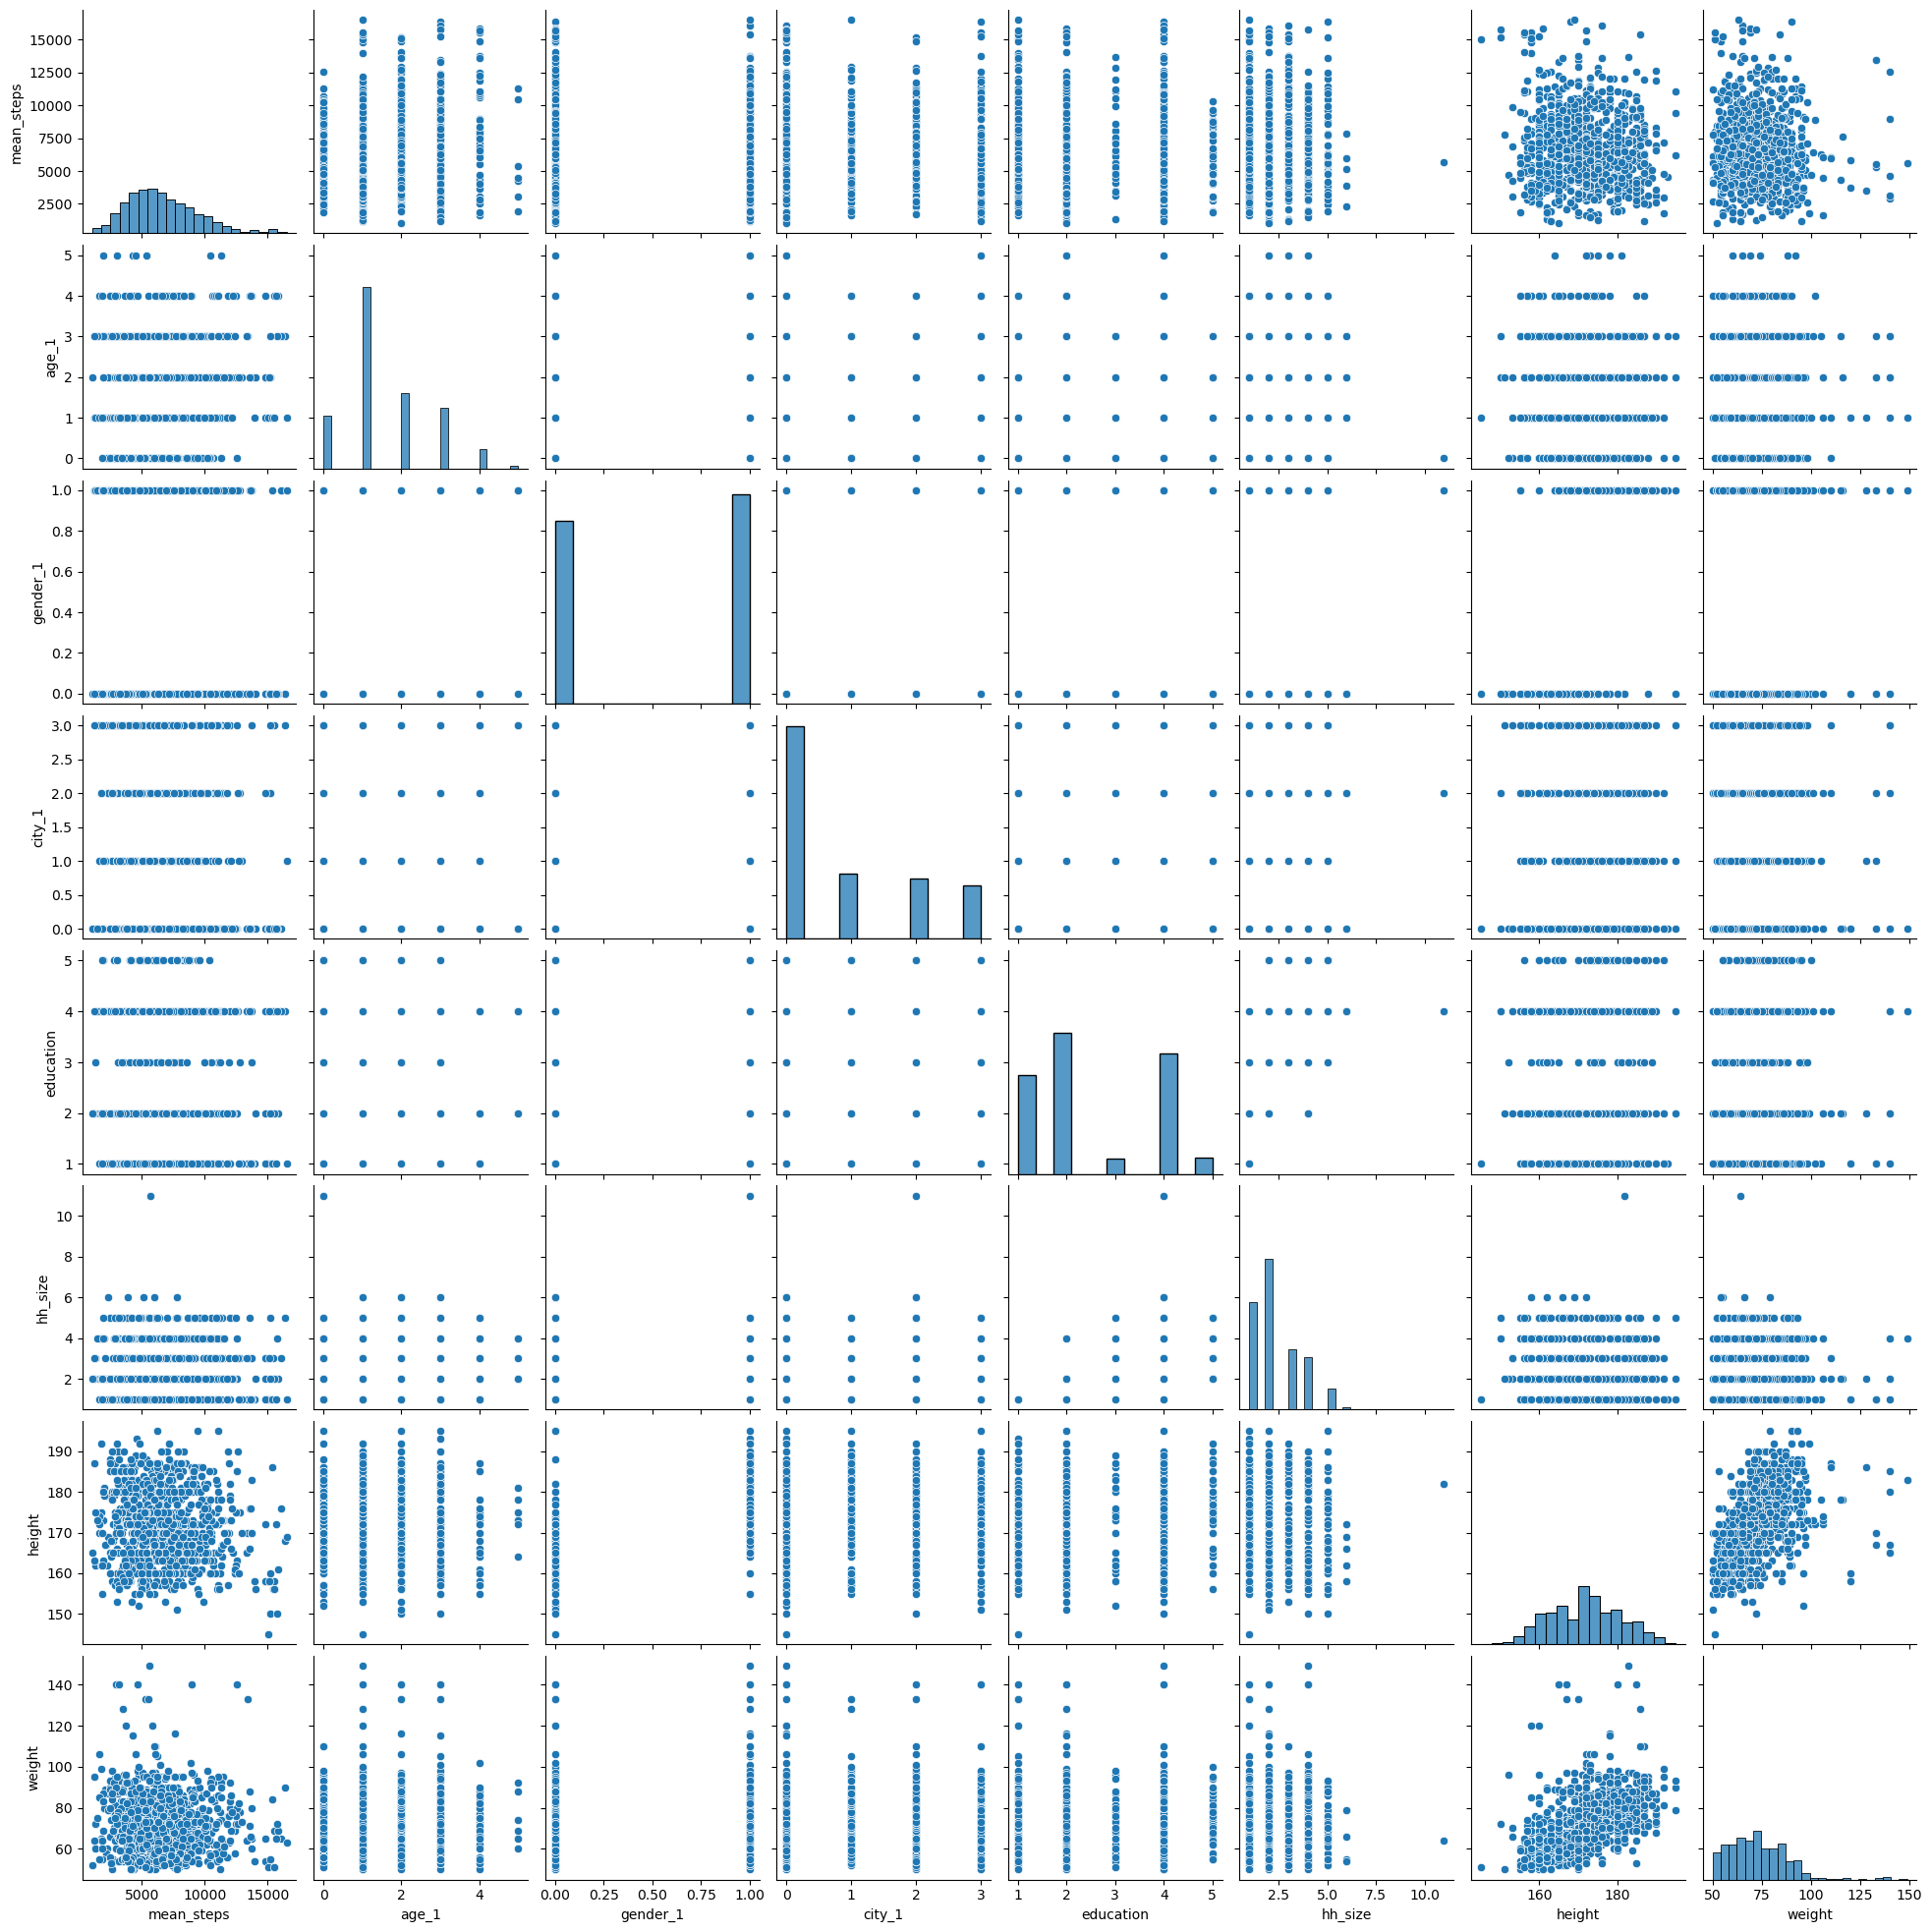

In [63]:
df_subset = df[["mean_steps","age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]]
sns.pairplot(df_subset)

In [64]:
df_subset.corr()

,mean_steps,age_1,gender_1,city_1,education,hh_size,height,weight
mean_steps,1.000000,0.146416,-0.062708,-0.123791,0.013688,0.031177,-0.085901,-0.068627
age_1,0.146416,1.000000,-0.047533,0.001663,0.100151,0.148992,-0.093429,0.022580
gender_1,-0.062708,-0.047533,1.000000,0.050511,-0.004663,-0.019398,0.712072,0.406901
city_1,-0.123791,0.001663,0.050511,1.000000,-0.010504,0.042180,0.054170,0.068313
education,0.013688,0.100151,-0.004663,-0.010504,1.000000,0.824800,-0.037291,0.010132
hh_size,0.031177,0.148992,-0.019398,0.042180,0.824800,1.000000,-0.050216,0.013754
height,-0.085901,-0.093429,0.712072,0.054170,-0.037291,-0.050216,1.000000,0.490824
weight,-0.068627,0.022580,0.406901,0.068313,0.010132,0.013754,0.490824,1.000000


## Predictive model

Explain linear regression in your own words

Als er een verband is tussen 2 of meer variabelen, kan je een voorspelling doen gebaseerd op de variabelen die je al hebt. 



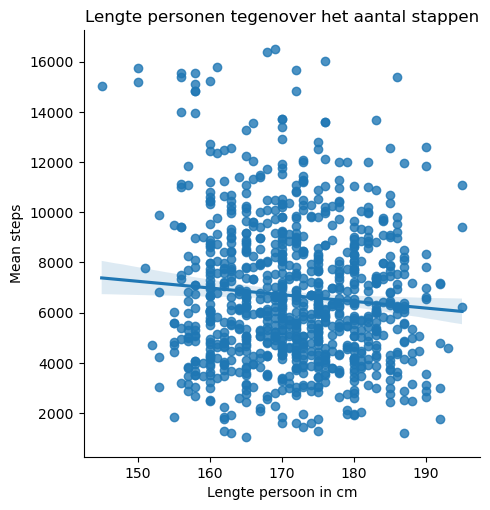

In [65]:
sns.lmplot(x="height", y="mean_steps", data=df) 
plt.xlabel('Lengte persoon in cm')
plt.ylabel('Mean steps')
plt.title('Lengte personen tegenover het aantal stappen')
plt.show()

In [66]:
df=df.dropna(subset=["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight", "mean_steps"])

Hierboven heb ik alle NaN's gedropt uit de subset. Ik heb het idee dat er een fout zit in de opdracht (of in mijn kunnen) omdat ik weinig echt heldere verbanden zie in de data.


In [67]:
from sklearn.linear_model import LinearRegression 

x = df[["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]] 
y = df["mean_steps"]
lm = LinearRegression() 
lm = lm.fit(x, y) 

In [68]:
df["mean_steps_predict"] = lm.predict(x) 
df.head(10)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,education,education_1,height,weight,mean_steps,median_steps,gender_1,city_1,age_1,mean_steps_predict
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,4,Master or doctorate,178.0,98.0,10205.521212,9860.0,1,3,1,5449.936640
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,3,Bachelor,180.0,77.0,5687.423313,5374.0,1,0,2,6749.058284
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,2,Master or doctorate,180.0,83.0,8301.729730,8220.0,1,1,1,6281.730515
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,Bachelor,178.0,80.0,3633.200000,3000.0,1,2,0,5626.177359
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Bachelor,167.0,61.0,5312.129630,4986.5,0,1,1,6399.731826
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,1,Vocational,170.0,63.0,11908.509804,11661.0,1,0,2,7229.728523
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,Master or doctorate,175.0,75.0,4715.400000,3961.0,1,1,1,6370.639496
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Master or doctorate,165.0,88.0,3594.051724,3032.5,0,3,1,5464.351469
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,Vocational,172.0,69.0,8626.707965,8265.0,0,0,2,7162.613822
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,2,Master or doctorate,165.0,93.0,3787.043478,3463.0,0,0,1,6519.847415


In [69]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df["mean_steps"], df['mean_steps_predict'])

0.045965897351358254

In [70]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df["mean_steps"], df["mean_steps_predict"]))

2706.374878056236

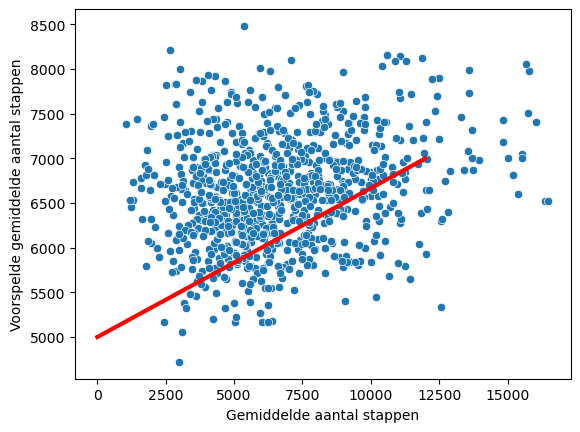

In [71]:
sns.scatterplot(x="mean_steps",y="mean_steps_predict",data=df)
plt.plot([0, 12000], [5000, 7000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Gemiddelde aantal stappen')
plt.ylabel('Voorspelde gemiddelde aantal stappen')
plt.show()

In [73]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn
from sklearn.metrics import r2_score #we need this function from sklearn
import itertools
#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
stuff = ["age_1", "gender_1", "city_1", "education", "hh_size", "height", "weight"]
for L in range(len(stuff) + 1):
  for subset in itertools.combinations(stuff, L):
    combi = list(subset)
    
    if len(combi) != 0:
      x = df[combi] 
      y = df["mean_steps"]
      lm = LinearRegression() #this creates a new LR model
      lm = lm.fit(x, y) #this "fits" the model
      df["mean_steps1"] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
      r2 = r2_score(df['mean_steps'], df['mean_steps1'])
      print(combi, r2)

['age_1'] 0.02450872659650627
['gender_1'] 0.002353738144105777
['city_1'] 0.0149303435967999
['education'] 2.658750944017907e-05
['hh_size'] 0.00038035530236135706
['height'] 0.003420835010872758
['weight'] 0.004647523457239289
['age_1', 'gender_1'] 0.02612015146697344
['age_1', 'city_1'] 0.040084379313048424
['age_1', 'education'] 0.024941754391641147
['age_1', 'hh_size'] 0.0245180512723584
['age_1', 'height'] 0.026264470712693888
['age_1', 'weight'] 0.0296363864060033
['gender_1', 'city_1'] 0.016740610441114634
['gender_1', 'education'] 0.002377870317472275
['gender_1', 'hh_size'] 0.002712901631732545
['gender_1', 'height'] 0.0035331743312831954
['gender_1', 'weight'] 0.005158964823874346
['city_1', 'education'] 0.01497714713224041
['city_1', 'hh_size'] 0.015529638103940147
['city_1', 'height'] 0.01764404620101534
['city_1', 'weight'] 0.01854269806077935
['education', 'hh_size'] 0.0017781778710275198
['education', 'height'] 0.003463307476641919
['education', 'weight'] 0.004668605916

## Conclusie

Ik heb het idee dat de opdracht niet helemaal klopt, aangezien er niet echt een verband uit getrokken kan worden uit deze gecombineerde dataset. de r2 scores zijn te laag en de sqr score te hoog om voorspellingen te kunnen doen op de variabelen.

